In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
import time
from datetime import datetime
import collections
import matplotlib.pyplot as plt
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

In [3]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [4]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [5]:
date = datetime.strftime(datetime.now(), "%m/%d/%Y")

In [6]:
target_users = ("FoxNews", "CNN", "CBS", "nytimes", "BBC")

sentiments = {}

for user in target_users:
    d = {f"compound_{user}": [],
         f"pos_{user}": [],
         f"neg_{user}": [],
         f"neu_{user}": [],
         f"tweet_{user}": [],
         f"tweet_time_{user}": [],
         f"tweet_ago_{user}": []}
    sentiments.update(d)

In [7]:
sentiments

{'compound_FoxNews': [],
 'pos_FoxNews': [],
 'neg_FoxNews': [],
 'neu_FoxNews': [],
 'tweet_FoxNews': [],
 'tweet_time_FoxNews': [],
 'tweet_ago_FoxNews': [],
 'compound_CNN': [],
 'pos_CNN': [],
 'neg_CNN': [],
 'neu_CNN': [],
 'tweet_CNN': [],
 'tweet_time_CNN': [],
 'tweet_ago_CNN': [],
 'compound_CBS': [],
 'pos_CBS': [],
 'neg_CBS': [],
 'neu_CBS': [],
 'tweet_CBS': [],
 'tweet_time_CBS': [],
 'tweet_ago_CBS': [],
 'compound_nytimes': [],
 'pos_nytimes': [],
 'neg_nytimes': [],
 'neu_nytimes': [],
 'tweet_nytimes': [],
 'tweet_time_nytimes': [],
 'tweet_ago_nytimes': [],
 'compound_BBC': [],
 'pos_BBC': [],
 'neg_BBC': [],
 'neu_BBC': [],
 'tweet_BBC': [],
 'tweet_time_BBC': [],
 'tweet_ago_BBC': []}

In [8]:
# Get 100 tweets for each news network  
for target_user in target_users:
    
    public_tweets = [] 

    for page_num in range(1, 6):
        tweets = api.user_timeline(target_user, page=page_num, type='recent')
        public_tweets += tweets
        
    number_of_tweets = len(public_tweets)
    
    for num in range(number_of_tweets):   
        tweet = public_tweets[num]
        tweet_time = datetime.strptime(tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
       
        # Calculate the time between the two tweets
        if num == (number_of_tweets - 1): # for the last tweet
            tweet_ago = 0 
        else:
            previous_tweet = public_tweets[num+1]
            previous_tweet_time = datetime.strptime(previous_tweet['created_at'], "%a %b %d %H:%M:%S %z %Y")
            tweet_ago = round((tweet_time - previous_tweet_time).seconds/60, 2) # in minutes
        
        # Run Vader Analysis on tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"] * -1
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        tweet = tweet["text"]

        # Add each value to the sentiments
        sentiments[f"compound_{target_user}"].append(compound)
        sentiments[f"pos_{target_user}"].append(pos)
        sentiments[f"neg_{target_user}"].append(neg)
        sentiments[f"neu_{target_user}"].append(neu)
        sentiments[f"tweet_{target_user}"].append(tweet)
        sentiments[f"tweet_time_{target_user}"].append(tweet_time)
        sentiments[f"tweet_ago_{target_user}"].append(tweet_ago)

print("done")    

done


In [9]:
sentiments_df = pd.DataFrame(sentiments)

In [10]:
sentiments_df.head()

,compound_FoxNews,pos_FoxNews,neg_FoxNews,neu_FoxNews,tweet_FoxNews,tweet_time_FoxNews,tweet_ago_FoxNews,compound_CNN,pos_CNN,neg_CNN,...,tweet_nytimes,tweet_time_nytimes,tweet_ago_nytimes,compound_BBC,pos_BBC,neg_BBC,neu_BBC,tweet_BBC,tweet_time_BBC,tweet_ago_BBC
0,0.0000,0.000,-0.000,1.000,Rep. Nancy Pelosi Calls Republicans 'Despicabl...,2018-09-30 10:08:00+00:00,7.98,0.5719,0.198,-0.000,...,"""Rarely has the reputation of a leader fallen ...",2018-09-30 10:00:04+00:00,9.03,-0.7579,0.048,-0.251,0.701,This is disgusting. 😔\n\nThe Citarum River in ...,2018-09-30 10:00:00+00:00,55.97
1,0.0000,0.000,-0.000,1.000,President @realDonaldTrump addressed the FBI i...,2018-09-30 10:00:01+00:00,8.02,0.0000,0.000,-0.000,...,Indonesia Tsunami Toll Soars Amid Push to Save...,2018-09-30 09:51:02+00:00,9.32,0.0000,0.000,-0.000,1.000,🐻 Say hello to Kyra the sun bear... \n\nhttps:...,2018-09-30 09:04:02+00:00,33.77
2,-0.1132,0.232,-0.251,0.516,OPINION: Why is the Kavanaugh Supreme Court fi...,2018-09-30 09:52:00+00:00,7.00,0.6597,0.252,-0.000,...,"Train stations, some remade and others crumbli...",2018-09-30 09:41:43+00:00,17.08,-0.5994,0.000,-0.302,0.698,RT @BBCWorld: Indonesia quake death toll 'at l...,2018-09-30 08:30:16+00:00,59.18
3,0.7579,0.394,-0.000,0.606,".@POTUS: ""America is winning again and America...",2018-09-30 09:45:00+00:00,8.00,-0.3400,0.000,-0.194,...,“Bolivia starts producing wine where everybody...,2018-09-30 09:24:38+00:00,16.48,0.0000,0.124,-0.124,0.752,"For children with autism, the stress of taking...",2018-09-30 07:31:05+00:00,27.05
4,0.4588,0.200,-0.000,0.800,Demi Lovato’s overdose sparked massive interes...,2018-09-30 09:37:00+00:00,6.98,0.0000,0.000,-0.000,...,"""Shock isn’t actually an emotion. It’s an ampl...",2018-09-30 09:08:09+00:00,17.35,0.5859,0.226,-0.000,0.774,This. Is. Amazing. 😮\n\nIntroducing the World ...,2018-09-30 07:04:02+00:00,631.98


In [11]:
sentiments_df.shape

(100, 35)

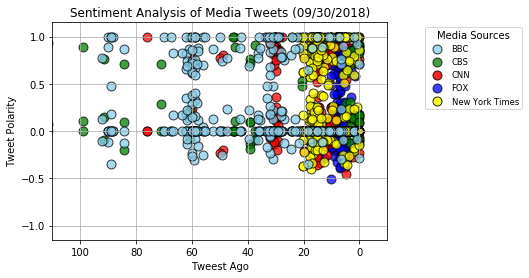

In [12]:
# Plot the sentimental Analysis

plt.xlim(110, -10)
plt.ylim(-1.15, 1.15)
plt.grid(True)

plt.title(f"Sentiment Analysis of Media Tweets ({date})")
plt.xlabel("Tweest Ago")
plt.ylabel("Tweet Polarity")

target_users_with_colors = {"FoxNews": "blue", "CNN": "red", "CBS": "green", "nytimes": "yellow", "BBC": "skyblue"}

for key, value in target_users_with_colors.items():
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"pos_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neg_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    plt.scatter(sentiments[f"tweet_ago_{key}"], sentiments[f"neu_{key}"], facecolors=value, edgecolors="black",
            s=80, alpha=0.75, label=f"{key}")
    
# Create dummy objects for legend
h1 = plt.scatter([-0.1], [0], marker="o", facecolors="skyblue", edgecolors="black", alpha=0.75, label="BBC")
h2 = plt.scatter([-0.1], [0], marker="o", facecolors="green", edgecolors="black", alpha=0.75, label="CBS")
h3 = plt.scatter([-0.1], [0], marker="o", facecolors="red", edgecolors="black", alpha=0.85, label="CNN")
h4 = plt.scatter([-0.1], [0], marker="o", facecolors="blue", edgecolors="black", alpha=0.75, label="FOX")
h5 = plt.scatter([-0.1], [0], marker="o", facecolors="yellow", edgecolors="black", alpha=0.85, label="New York Times")
# Set legend
legend = plt.legend(handles=[h1, h2, h3, h4, h5], markerscale=1.5, title="Media Sources", bbox_to_anchor=(1.1, 1), fontsize='small', fancybox=True)

In [13]:
# Calculate compound mean for each news network
overall_sentimental = {}
for user in target_users:
    if user == "FoxNews":
        user1 = "Fox"
    elif user == "nytimes":
        user1 = "NYT"
    else:
        user1 = user
    overall_sentimental[f"{user1}"] = round(sentiments_df[f"compound_{user}"].mean(),2)
overall_sentimental

{'Fox': 0.04, 'CNN': 0.0, 'CBS': 0.14, 'NYT': 0.02, 'BBC': 0.1}

In [21]:
overall_sentimental = collections.OrderedDict(sorted(overall_sentimental.items(), key=lambda t: t[0]))
overall_sentimental

OrderedDict([('BBC', 0.1),
             ('CBS', 0.14),
             ('CNN', 0.0),
             ('Fox', 0.04),
             ('NYT', 0.02)])

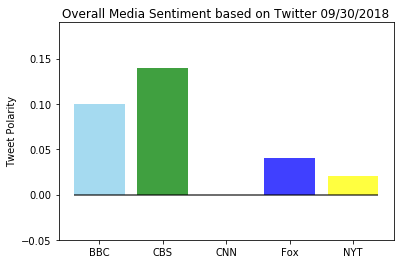

In [40]:
# Plot
columns = list(overall_sentimental.keys())
average_compound = list(overall_sentimental.values())

plt.ylim(-min(average_compound) - 0.05, max(average_compound) + 0.05)
x_axis = np.arange(len(columns))
y_axis = list(overall_sentimental.values())

plt.title(f"Overall Media Sentiment based on Twitter {date}")
plt.ylabel("Tweet Polarity")

plt.hlines(y=0, xmin=-0.4, xmax=4.4, alpha=0.75)

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, columns)

colors = ["skyblue", "green", "red", "blue", "yellow"]

for i in range(len(x_axis)):
    plt.bar(x_axis[i], y_axis[i], color=colors[i], alpha=0.75, align="center")
plt.show()